<a href="https://colab.research.google.com/github/YangStark/32ics/blob/master/%E2%80%9Cproject_flower_v2(2000).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.python.framework import ops
from google.colab import files
import matplotlib.pyplot as plt

from io import BytesIO
from google.colab import drive
from scipy.io import loadmat

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls "/content/drive/My Drive/"

'AP first draft.gdoc'			   'project flower'
'Colab Notebooks'			   'PS 1.00.gdoc'
'Copy of 伊織もえTwitter画像集　2015.zip'  'SOP and PS.gdoc'
 draft1.gdoc				   'unofficial trans.pdf'
'Fishing for Billions.gslides'		   'Untitled folder'
 Hw5.pdf				   'Untitled presentation.gslides'
'Ikko Japanese Cuisine.docx'		   'WR39C .gslides'
'Ikko Japanese Cuisine.docx.gdoc'	   'Zian Yang Essay.docx'
'Ikko Japanese Cuisine.gdoc'		   'Zian Yang Essay.docx.gdoc'
 newsu.gdoc				   'ZIAN YANG NEW - ELC.pdf'
 presentation.gslides


In [0]:
!cp "/content/drive/My Drive/project flower/same res/image_00001.jpg" sample_data/###复制文件###


In [4]:
openf = PIL.Image.open("/content/drive/My Drive/project flower/same res/image_08189.jpg")
print(openf)
openf.show()

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=255x255 at 0x7FE2DA132F28>


In [5]:
def load_dataset_x(n:int):###first n training examples
    
    rt = np.zeros((n,195075))

    for i in range(1,n+1):
        
        ###load image to new_sample###
        str_num = (4-len(str(i)))*"0"+str(i)
        new_sample = np.array(PIL.Image.open("/content/drive/My Drive/project flower/same res/image_0"+str_num+".jpg"))
        assert new_sample.shape == (255,255,3)
        
        ###turn image vector into row vector and add to the bottom of rt###
        rt[i-1] = new_sample.reshape(1,195075)
        
        ###every 100 sample print
        if i % 400 == 0:
            print(i)

        
    return rt.T

training_data = load_dataset_x(2000)
print(training_data.shape)
      

400
800
1200
1600
2000
(195075, 2000)


In [6]:
print("size of training data is"+str(training_data.shape))

size of training data is(195075, 2000)


In [0]:
def load_label_y(n:int):###first n training labels
    
    ### this dataset has 120 different kinds of flowers
    rt =  np.zeros((n,120))

    ###load labels into an row vector
    labels = loadmat("/content/drive/My Drive/project flower/imagelabels.mat")["labels"][0][:n]

    print("training labels is"+str(labels)+","+"it has shape of"+str(labels.shape))
    
    for i in range(1,n+1):
        rt[i-1][labels[i-1]-1] = 1
    
    ###we want shape of label = 120 x n
    return rt.T

In [8]:
training_data_label = load_label_y(2000)
print(training_data_label.shape)

training labels is[77 77 77 ... 80 80 80],it has shape of(2000,)
(120, 2000)


In [9]:
###make sure the data is correct
print("the last label transformed to row vector looks like:")
print(training_data_label.T[1999])
print()
labels = loadmat("/content/drive/My Drive/project flower/imagelabels.mat")["labels"][0][1999]
print("the original label looks like:")
print(labels)
print()
print("training_data_label.T[1999][11] == 1")
print(training_data_label.T[1999][11] == 1)
print()
print()
print("Note: the number on original label example(i) correspond to training_data_label[i][number-1]")

the last label transformed to row vector looks like:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

the original label looks like:
80

training_data_label.T[1999][11] == 1
False


Note: the number on original label example(i) correspond to training_data_label[i][number-1]


In [10]:
X_train = training_data
Y_train = training_data_label
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))

X_train shape: (195075, 2000)
Y_train shape: (120, 2000)


In [0]:
def create_placeholders(n_x,n_y):
    """
    create placeholder for input x and output y for tensorflow session
    
    n_x scalar : size of an image vector (195075) in this case
    n_y scalar : size of number of classes (120) in this case
    
    return X, Y  X.shape ==[n_x,None] and dtype float Y.shape == [n_x,None] and dtype float
    """
    X = tf.placeholder(tf.float32,shape = (n_x,None),name = "X")
    Y = tf.placeholder(tf.float32,shape = (n_y,None),name = "Y")
    
    return X,Y
    

In [12]:
X,Y  = create_placeholders(195075,120)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("X:0", shape=(195075, ?), dtype=float32)
Y = Tensor("Y:0", shape=(120, ?), dtype=float32)


In [0]:
def initialize_parameters():
    """
    initialize parameters for tensorflow, the shapes are:
    W1 : [128,195075]
    b1 : [128,1     ]
    W2 : [20 ,128   ]
    b2 : [20 ,1     ]
    W3 : [8  ,20    ]
    b3 : [8  ,1     ]
    W4 : [120,8     ]
    b4 : [120,1     ]
    
    returns:
    parameters -- a dict of tensors containing W1,b1 to W4,b4
    """
    tf.set_random_seed(1)
    
    W1 = tf.get_variable("W1",[128,195075], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1",[128,1     ], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2",[20 ,128   ], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2",[20 ,1     ], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3",[8  ,20    ], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3",[8  ,1     ], initializer = tf.zeros_initializer())
    W4 = tf.get_variable("W4",[120,8     ], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b4 = tf.get_variable("b4",[120,1     ], initializer = tf.zeros_initializer())
    
    parameters = {"W1":W1,
                  "W2":W2,
                  "W3":W3,
                  "W4":W4,
                  "b1":b1,
                  "b2":b2,
                  "b3":b3,
                  "b4":b4}
    return parameters
    

In [14]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    for key,value in parameters.items():
        print("key is "+str(key)+", value is "+str(value))

key is W1, value is <tf.Variable 'W1:0' shape=(128, 195075) dtype=float32_ref>
key is W2, value is <tf.Variable 'W2:0' shape=(20, 128) dtype=float32_ref>
key is W3, value is <tf.Variable 'W3:0' shape=(8, 20) dtype=float32_ref>
key is W4, value is <tf.Variable 'W4:0' shape=(120, 8) dtype=float32_ref>
key is b1, value is <tf.Variable 'b1:0' shape=(128, 1) dtype=float32_ref>
key is b2, value is <tf.Variable 'b2:0' shape=(20, 1) dtype=float32_ref>
key is b3, value is <tf.Variable 'b3:0' shape=(8, 1) dtype=float32_ref>
key is b4, value is <tf.Variable 'b4:0' shape=(120, 1) dtype=float32_ref>


In [0]:
def forward_propagation(X, parameters):
    """
    implement forward propagation:
    linear->relu->linear->relu->linear->relu->linear->softmax
    Z1    ->A1  ->Z2    ->A2  ->Z3    ->A3  ->Z4    ->prediction
    
    arguments:
    X ----------input for placeholder of shape(input size, number of examples) this case(195075,4000)
    parameters -python dict containing W1,b1 to W4,b4
    
    returns:
    Z4 ---------output of last layer of linear unit
    """
    ###get parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    
    ###implement functions
    Z1 = tf.add(tf.matmul(W1,X),b1)
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2)
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)
    A3 = tf.nn.relu(Z3)
    Z4 = tf.add(tf.matmul(W4,A3),b4)
    
    return Z4

In [16]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(195075, 120)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_3:0", shape=(120, ?), dtype=float32)


In [0]:
def compute_cost(Z4,Y):
    """
    compute cost of funtion
    
    argument:
    Z4 -------output for forward prop last layer of linear shape (120,1)
    Y --------true label vector placeholder  shape               (120,1)
    
    return
    cost - tensor of the cost function
    """
    
    ###in order to use tf.reduce_mean to compute cost we need to find logits and labels first
    logits = tf.transpose(Z4)
    labels = tf.transpose(Y)
    
    ###use tf.reduce
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    
    return cost

In [18]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(195075, 120)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [0]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0): ###from Andrew Ng's class
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    x = tf.placeholder("float", [12288, 1])
    
    z3 = forward_propagation_for_predict(x, params)
    p = tf.argmax(z3)
    
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction

In [0]:
def model(X_train,Y_train,X_test,Y_test,learning_rate = 0.0001,
         num_epochs = 100, minibatch_size = 32, print_cost = True):
    """
    
    arguments:
    X_train ---- training set of shape (image vector size = 195075,examples = 4000)
    Y_train ---- training set labels shape (number of different flowers = 120,examples = 4000)
    X_test ----- test set, shape       (image vector size = 195075,examples = 100)
    Y_test ----- test set, shape           (number of different flowers = 120,examples = 100)
    
    learning_rate -- learning rate of the optimization (all 4 lines from Andrew Ng's hw of deep learning)
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ###required stuff,seeds, not overwriting variables
    ops.reset_default_graph()
    tf.set_random_seed(1)
    seed = 3
    (n_x,m) = X_train.shape
    n_y = Y_train.shape[0]
    costs = []
    
    ###create placeholder&initialize model
    X,Y = create_placeholders(n_x,n_y)
    parameters = initialize_parameters()
    
    ###forwardprop and compute cost
    Z4 = forward_propagation(X,parameters)
    cost = compute_cost(Z4,Y)
    
    ###defind optimizer for backprop, since we want to use minibatch training, we use adamoptimizer
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    
    ###initialize_variables
    init = tf.global_variables_initializer()
    
    ###start tensorflow
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_epochs):
            
            ###initialize minibatches
            epoch_cost = 0.
            num_minibatches = int(m / minibatch_size)###number of minibatches
            seed += 1
            ###initialize list of different minibatches 
            minibatches = random_mini_batches(X_train,Y_train,minibatch_size,seed)
            
            for minibatch in minibatches:
                
                (minibatch_X,minibatch_Y) = minibatch
                ### run optimizer and cost function on minibatch
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                
                epoch_cost += minibatch_cost/num_minibatches
                
            ###print cost
            if print_cost == True and epoch % 25 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)

        # plot the cost all *******************************all below from Andrew Ng's Hw on deep learning****************************
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z4), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters    
    


In [21]:
np.random.seed(1)
X_train = training_data
Y_train = training_data_label
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))


X_train shape: (195075, 2000)
Y_train shape: (120, 2000)


In [22]:
###generate test set from 2000 training examples
np.random.seed(1)
randintlist = np.random.choice(2000, 100,replace=False)
X_test = np.zeros((195075,100))
Y_test = np.zeros((120,100))

for i in range(100):
    X_test[:,i] = X_train[:,randintlist[i]]
    Y_test[:,i] = Y_train[:,randintlist[i]]

print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

X_test shape: (195075, 100)
Y_test shape: (120, 100)


Cost after epoch 0: 12.961980
Cost after epoch 25: 4.610982
Cost after epoch 50: 4.370793
Cost after epoch 75: 4.143728


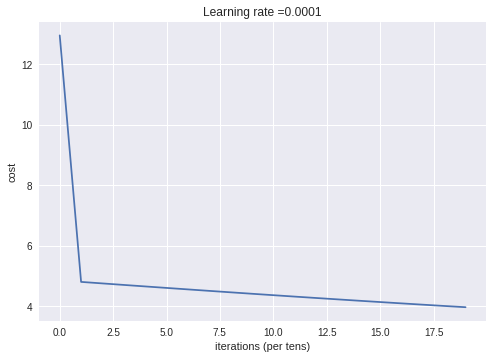

Parameters have been trained!
Train Accuracy: 0.1255
Test Accuracy: 0.11


In [23]:
parameters = model(X_train, Y_train, X_test, Y_test)

In [24]:
img = PIL.Image.open(BytesIO(uploaded["image_00001.jpg"]))
print(img)
pic1 = np.array(img)
pic1.shape
flat1 = pic1.reshape(pic1.shape[0]*pic1.shape[1]*pic1.shape[2],-1)
print(flat1.shape)
flat1[1]

NameError: ignored